# Week 3
## Case Study 3: Introduction to Classification
## Video 3.3.1: Introduction to kNN Classification

Statistical learning refers to a collection
of mathematical and computation tools to understand data.
In what is often called supervised learning,
the goal is to estimate or predict an output based on one or more inputs.
The inputs have many names, like predictors, independent variables,
features, and variables being called common.
The output or outputs are often called response variables,
or dependent variables.
If the response is quantitative-- say, a number that measures weight or height,
we call these problems regression problems.
If the response is qualitative-- say, yes or no, or blue or green,
we call these problems classification problems. This case study deals with one specific approach to classification.
The goal is to set up a classifier such that when
it's presented with a new observation whose category is not known,
it will attempt to assign that observation to a category, or a class,
based on the observations for which it does know the true category.
This specific method is known as the k-Nearest Neighbors classifier,
or kNN for short.

In this case study, we have seven different tasks.
We start by finding the distance between two points,
and we end with building our own homemade kNN classifier.


## Video 3.3.2: Finding the Distance Between Two Points

Finding the distance between two points is a commonly occurring problem.
We would like to write a function that takes in two points
and computes the distance between them.
And when we say distance, we're really talking about the Euclidean distance

In [68]:
import numpy as np

def distance(p1, p2):
    return(np.sqrt(np.sum(np.power(p2-p1, 2))))


p1 = np.array([1,1])
p2 = np.array([4,4])

print(distance(p1, p2))

4.242640687119285


## Video 3.3.3: Majority Vote

For building our KNN classifier, we need to be
able to compute, what is sometimes called, majority vote.
This means that given an array or a sequence of votes,
which could say numbers 1, 2, and 3, we
need to determine how many times each occurs,
and then find the most common element.  
Let's build a function called majority vote.

In [69]:
def majorityVotes(votes):
    voteCounts = {}
    for vote in votes:
        if vote in voteCounts:
            voteCounts[vote] +=1
        else:
            voteCounts[vote] = 1
    return (voteCounts)
    
votes = [1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
VoteCounts = majorityVotes(votes)
print(VoteCounts)

{1: 3, 2: 6, 3: 6}


In [70]:
maxKey = max(VoteCounts.keys())
maxCount = max(VoteCounts.values())

print(maxKey)
print(maxCount)

3
6


In [71]:
winners = []
maxCount = max(VoteCounts.values())
for vote, count in VoteCounts.items():
    if count == maxCount:
        winners.append(vote)
        
print(winners)

[2, 3]


In [72]:
import random

def majorityVotes(votes):
    voteCounts = {}
    for vote in votes:
        if vote in voteCounts:
            voteCounts[vote] +=1
        else:
            voteCounts[vote] = 1
            
        winners = []
        maxCount = max(VoteCounts.values())
        for vote, count in voteCounts.items():
            if count == maxCount:
                winners.append(vote)
                
    return (random.choice(winners))

In [73]:
votes = [1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
winner = majorityVotes(votes)
print(winner)

2


In [74]:
import scipy.stats as ss

def majorityVotesShort(votes):
    """return the most common element in votes short version"""
    mode, count = ss.stats.mode(votes)       
    return (mode)

In [75]:
votes = [1,1,1,2,2,2,2,2,2,3,3,3,3,3,3]
winner = majorityVotesShort(votes) # always return number 2 <-- look documentation of ss.stats.mode()
print(winner)

[2]


## Video 3.3.4: Finding Nearest Neighbors

Using very informal pseudocode, let's see
how we might be able to identify those nearest neighbors.

In [76]:
# loop over all points
    # compute the distance between point p and every other point 
# sort distance and return those k points that are nearest to point p

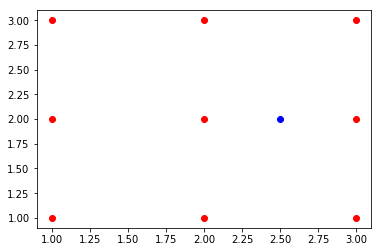

In [77]:
# Test data:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

def distance(p1, p2):
    return(np.sqrt(np.sum(np.power(p2-p1, 2))))

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])
    
plt.plot(points[:, 0], points[:, 1], "ro");
plt.plot(p[0], p[1], "bo");
#plt.axes([0.5,3.5,0.5,3.5])
plt.show();


In [78]:
print(distances)


[1.80277564 1.5        1.80277564 1.11803399 0.5        1.11803399
 1.11803399 0.5        1.11803399]


In [79]:
ind = np.argsort(distances)
print(ind)

[4 7 3 5 6 8 1 0 2]


In [80]:
print(distances[ind])


[0.5        0.5        1.11803399 1.11803399 1.11803399 1.11803399
 1.5        1.80277564 1.80277564]


In [81]:
# k nerest. 
k = 2
print(distances[ind[0: k]])

[0.5 0.5]


In [82]:
# combine it in to the function:

def findNearestNeighbours(p, points, k = 5):
    """ Find the k nearest neighbours of point p and return thair indices """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return(ind[: k])
    

In [83]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

ind = findNearestNeighbours(p, points, 2)
print(points[ind])
print("\n")

ind = findNearestNeighbours(p, points, 3)
print(points[ind])

[[2 2]
 [3 2]]


[[2 2]
 [3 2]
 [2 1]]


Let's then write the function to predict the class of our new point p.
We'll call that function knn predict, and it
takes in three parameters-- p, the new point we'd like to classify,
points, our existing data or our training data, and the value for k.
Let's first write this as pseudocode.

In [84]:
# find k nearest neighbours
# predict the class of p based on majority vote

In [85]:
def knn_predict(p, points, outcomes, k=5):
    ind = findNearestNeighbours(p, points, k)
    return(majorityVotes(outcomes[ind]))

In [86]:
#outcomes = np.array([0,0,0,0,1,1,1,1,1]) # possibe classification classes 0, 1
#points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

#knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)

## Video 3.3.5: Generating Synthetic Data

In [87]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt


ss.norm(0,1).rvs((5,2)) # generate... in 5 rows and 2 columns
ss.norm(1,1).rvs((5,2))

np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis = 0) # concatinate accros rows (axis = 0)

array([[ 0.32747703, -0.76337926],
       [-1.3896262 , -1.17134742],
       [-0.83009002,  0.86692234],
       [-0.74568271,  0.15913595],
       [-1.38829631,  0.51411259],
       [ 0.58431597,  0.28349823],
       [ 0.16440583,  2.46988682],
       [ 1.65675606,  1.97438478],
       [ 0.025911  ,  0.49869606],
       [ 2.3054355 ,  1.17609479]])

In [88]:
n = 20

outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))


In [89]:
# all together as a function:

def generateSynthData(n = 50):
    """Create two sets of points form bivariate normal distribution."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return(points, outcomes)
    

In [90]:
#print(generateSynthData(20))

<Figure size 432x288 with 0 Axes>

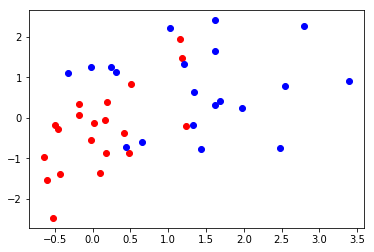

<Figure size 432x288 with 0 Axes>

In [91]:
points, outcomes = generateSynthData(20)
n= 20
plt.plot(points[:n,0], points[:n, 1], "ro");
plt.plot(points[n:,0], points[n:, 1], "bo");
plt.figure()

## Video 3.3.6: Making a Prediction Grid

In [92]:
##################### Introduction to Classification All. #####################

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random


def majorityVotes(votes):
    """Return winner based on votes"""
    voteCounts = {}
    for vote in votes:
        if vote in voteCounts:
            voteCounts[vote] +=1
        else:
            voteCounts[vote] = 1
            
        winners = []
        maxCount = max(voteCounts.values())
        for vote, count in voteCounts.items():
            if count == maxCount:
                winners.append(vote)
                
    return (random.choice(winners))


def distance(p1, p2):
    """Return the distance between points"""
    return(np.sqrt(np.sum(np.power(p2-p1, 2))))


def findNearestNeighbours(p, points, k = 5):
    """ Find the k nearest neighbours of point p and return thair indices """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return(ind[:k])


def knn_predict(p, points, outcomes, k=5):
    ind = findNearestNeighbours(p, points, k)
    return(majorityVotes(outcomes[ind]))


def generateSynthData(n = 50):
    """Create two sets of points form bivariate normal distribution."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return(points, outcomes)


##################### Making a Prediction Grid #####################

def makePredictionGrid(predictors, outcomes, limits, h, k):
    """Create prediction Grid using np.mashgrid"""
    (xMin, xMax, yMin, yMax) = limits
    xs = np.arange(xMin, xMax, h)
    ys = np.arange(yMin, yMax, h)
    xx, yy = np.meshgrid(xs,ys)
    
    predictionGrid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([y,x])
            predictionGrid[j,i] = knn_predict(p, predictors, outcomes, k)
    return(xx, yy, predictionGrid)


def plotPredictionGrid (xx, yy, predictionGrid, filename):
    """Plot KNN predictions for every point on the grid."""
    background_colormap = ListedColormap (["hotpink","lightskyblue","yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, predictionGrid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig("res/img/plotPredictionGrid")

In [93]:
# Predictors and Outcomes shape check

(predictors, outcomes) = generateSynthData()
print(predictors.shape)
print(outcomes.shape)

(100, 2)
(100,)


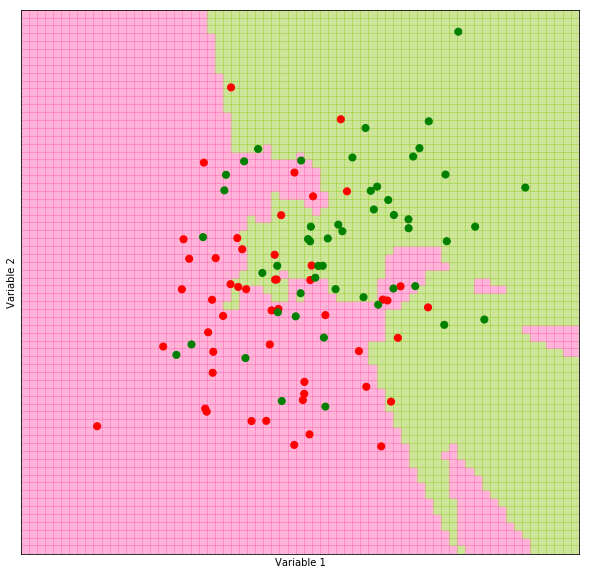

In [94]:
# Test for kNNClassification:

(predictors, outcomes) = generateSynthData()
k = 5; filename = "knn_synth_5.png"; limits = (-3,4,-3,4); h = 0.1
(xx, yy, predictionGrid) = makePredictionGrid(predictors, outcomes, limits, h, k)
plotPredictionGrid(xx, yy, predictionGrid, filename)

## Video 3.3.8: Applying the kNN Method

In [95]:
from sklearn import datasets

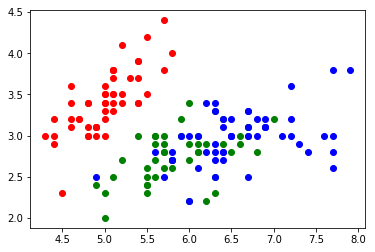

In [96]:
iris = datasets.load_iris()
predictors = iris.data[:, 0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("res/img/iris.png")

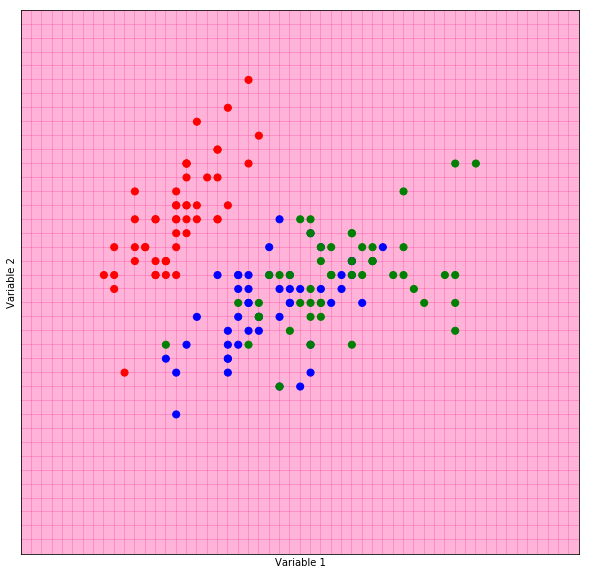

In [97]:
k = 5; filename = "knn_iris.png"; limits = (3.5,9,1,5); h = 0.1
(xx, yy, predictionGrid) = makePredictionGrid(predictors, outcomes, limits, h, k)
plotPredictionGrid(xx, yy, predictionGrid, filename)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)

sk_predictions = knn.predict(predictors)
print(sk_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 2 1]
